Scenario: Retail Chain – Predicting Customer Churn
A large retail chain wants to predict whether customers are likely to stop shopping (churn) based on features like:
Monthly_Spend (average purchase value)
Visits_Per_Month (store or app visits)
Discount_Usage (frequency of coupon/redemption use)
Satisfaction_Score (feedback survey rating)
Since individual decision trees can be unstable and sensitive to small changes in data (high variance), the company applies Bagging to build an ensemble of trees. Bagging uses bootstrap sampling with replacement to train multiple models on different subsets of customers and then aggregates their predictions.
This helps the retail chain achieve more stable and reliable churn predictions, reducing the risk of overfitting to any single customer segment.
 
✨ This scenario mirrors the IT attrition case but shifts the domain to customer churn in retail, which is equally relatable for Bagging assessment.
Would you like me to create two or three more alternative scenarios (e.g., healthcare, banking, education) so you have a set of options to use in your Bagging assessment exercises?

In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("retail_churn_data.csv")
df.size

300

In [4]:
df.head(2)

,Customer_ID,Monthly_Spend,Visits_Per_Month,Discount_Usage,Satisfaction_Score,Churn
0,CUST1000,5745.07,9,3,1.1,No
1,CUST1001,4792.60,15,3,3.4,No


In [5]:
colms=["Churn"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in colms:
    df[col] = le.fit_transform(df[col])


In [6]:
df.head(2)

,Customer_ID,Monthly_Spend,Visits_Per_Month,Discount_Usage,Satisfaction_Score,Churn
0,CUST1000,5745.07,9,3,1.1,0
1,CUST1001,4792.60,15,3,3.4,0


In [7]:
df=df.drop(columns=["Customer_ID","Satisfaction_Score"])
df.head(2)

,Monthly_Spend,Visits_Per_Month,Discount_Usage,Churn
0,5745.07,9,3,0
1,4792.60,15,3,0


In [8]:
X=df.drop(columns="Churn")
y=df['Churn']

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
base_tree=DecisionTreeClassifier(random_state=42)

bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
testsize=[0.3,0.2]
for i in testsize:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i,stratify=y,random_state=42)

    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)

    print(f"Test_Size: {i},  Bagging Model Accuracy: {accuracy_score(y_test, y_pred)}")

    


Test_Size: 0.3,  Bagging Model Accuracy: 0.8
Test_Size: 0.2,  Bagging Model Accuracy: 0.9


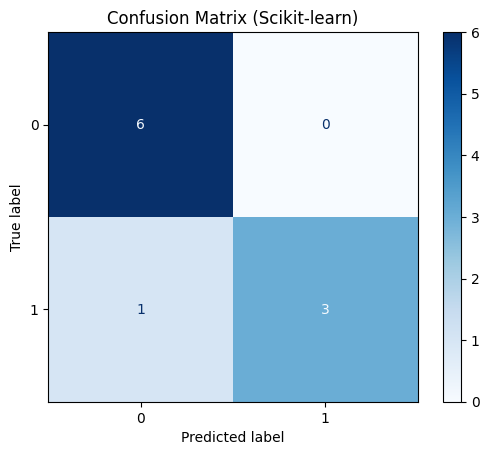

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=bagging_model.classes_)

class_names = df["Churn"].unique()
# 3. Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues) # You can change the color map (e.g., 'Greens', 'plasma')
plt.title("Confusion Matrix (Scikit-learn)")
plt.show()